We first __import__ some important packages. 

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

import pandas as pd
import networkx as nx

The SP dataframe contains the PDB number and Chain number, in particular, used in this analysis. 

In [2]:
SP = pd.read_csv('pbd_chain_uniprotPF00089.csv')
SP.head()

PDB CHAIN SP_PRIMARY  PFAM_ID
0  1a0h     B     P00735  PF00089
1  1a0j     A     P35033  PF00089
2  1a0l     A     P20231  PF00089
3  1a2c     H     P00734  PF00089
4  1a3b     H     P00734  PF00089

We next load the __SerineProteaseSimilarities.csv__ matrix.  

In [3]:
SPSimsArray = np.loadtxt('SerineProteaseSimilarities.csv',delimiter = ',')

#pd.read_csv('SerineProteaseSimilarities.csv', usecols=SP.PDB)
SPSimsArray.shape

(1991, 1991)

We then convert this array into a pandas __DataFrame__ so that we can access entries by their PDB name.  

In [4]:
SPSims = pd.DataFrame(SPSimsArray, columns = SP.PDB, index = SP.PDB)

In [5]:
SPSims.describe()

PDB      1a0h         1a0j         1a0l         1a2c         1a3b  \
count  1991.0  1991.000000  1991.000000  1991.000000  1991.000000   
mean      0.0     0.000024     0.000215     0.000105     0.000128   
std       0.0     0.001085     0.008703     0.003323     0.003499   
min       0.0     0.000000     0.000000     0.000000     0.000000   
25%       0.0     0.000000     0.000000     0.000000     0.000000   
50%       0.0     0.000000     0.000000     0.000000     0.000000   
75%       0.0     0.000000     0.000000     0.000000     0.000000   
max       0.0     0.048400     0.386000     0.140000     0.131000   

PDB           1a3e         1a46         1a4w         1a5g         1a5h  \
count  1991.000000  1991.000000  1991.000000  1991.000000  1991.000000   
mean      0.000942     0.001358     0.001857     0.002358     0.000421   
std       0.027322     0.033029     0.039835     0.045463     0.007218   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       0.978000     0.921000     0.948000     0.952000     0.139000   

PDB       ...              6est         6lpr         7est         7kme  \
count     ...       1987.000000  1987.000000  1987.000000  1963.000000   
mean      ...          0.249838     0.116656     0.247149     0.159594   
std       ...          0.215437     0.140621     0.215472     0.293448   
min       ...         -0.000019    -0.000063    -0.000018    -0.000068   
25%       ...          0.070800     0.058600     0.071200     0.023600   
50%       ...          0.280000     0.091500     0.280000     0.026500   
75%       ...          0.364000     0.148000     0.364000     0.043150   
max       ...          0.998000     1.000000     0.998000     0.946000   

PDB           7lpr         8est         8kme         8lpr         9est  \
count  1987.000000  1987.000000  1984.000000  1987.000000  1987.000000   
mean      0.117388     0.252881     0.156134     0.117842     0.252516   
std       0.141766     0.215569     0.285814     0.143253     0.217104   
min      -0.000061    -0.000053    -0.000020    -0.000023    -0.000054   
25%       0.058900     0.071500     0.022200     0.059200     0.070500   
50%       0.092800     0.281000     0.027400     0.092900     0.281000   
75%       0.148000     0.364000     0.042900     0.148000     0.364000   
max       1.000000     0.999000     0.937000     1.000000     0.999000   

PDB           9lpr  
count  1987.000000  
mean      0.118211  
std       0.145036  
min      -0.000061  
25%       0.058250  
50%       0.092300  
75%       0.148000  
max       1.000000  

[8 rows x 1991 columns]

Notice that filling missing terms with zeros produces little change in the data. 

In [8]:
SPSims.fillna(0).describe()  # Assume na corresponds to no similarity 

PDB      1a0h         1a0j         1a0l         1a2c         1a3b  \
count  1991.0  1991.000000  1991.000000  1991.000000  1991.000000   
mean      0.0     0.000024     0.000215     0.000105     0.000128   
std       0.0     0.001085     0.008703     0.003323     0.003499   
min       0.0     0.000000     0.000000     0.000000     0.000000   
25%       0.0     0.000000     0.000000     0.000000     0.000000   
50%       0.0     0.000000     0.000000     0.000000     0.000000   
75%       0.0     0.000000     0.000000     0.000000     0.000000   
max       0.0     0.048400     0.386000     0.140000     0.131000   

PDB           1a3e         1a46         1a4w         1a5g         1a5h  \
count  1991.000000  1991.000000  1991.000000  1991.000000  1991.000000   
mean      0.000942     0.001358     0.001857     0.002358     0.000421   
std       0.027322     0.033029     0.039835     0.045463     0.007218   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       0.978000     0.921000     0.948000     0.952000     0.139000   

PDB       ...              6est         6lpr         7est         7kme  \
count     ...       1991.000000  1991.000000  1991.000000  1991.000000   
mean      ...          0.249336     0.116422     0.246653     0.157349   
std       ...          0.215511     0.140577     0.215540     0.291982   
min       ...         -0.000019    -0.000063    -0.000018    -0.000068   
25%       ...          0.070700     0.058550     0.071000     0.023600   
50%       ...          0.280000     0.091300     0.279000     0.026400   
75%       ...          0.364000     0.148000     0.364000     0.042300   
max       ...          0.998000     1.000000     0.998000     0.946000   

PDB           7lpr         8est         8kme         8lpr         9est  \
count  1991.000000  1991.000000  1991.000000  1991.000000  1991.000000   
mean      0.117152     0.252373     0.155585     0.117605     0.252009   
std       0.141721     0.215650     0.285461     0.143206     0.217181   
min      -0.000061    -0.000053    -0.000020    -0.000023    -0.000054   
25%       0.058750     0.071350     0.022150     0.059100     0.070300   
50%       0.092600     0.281000     0.027400     0.092500     0.281000   
75%       0.147500     0.364000     0.042800     0.148000     0.364000   
max       1.000000     0.999000     0.937000     1.000000     0.999000   

PDB           9lpr  
count  1991.000000  
mean      0.117973  
std       0.144987  
min      -0.000061  
25%       0.058200  
50%       0.092200  
75%       0.148000  
max       1.000000  

[8 rows x 1991 columns]

In [18]:
SPSimsNoNA = SPSims.fillna(0)

In [11]:
SPSimsNoNA.to_csv('SerProtSims.csv')  # Sve t

Let's look at the data in terms of a histogram of similarities.  

In [22]:
SP = SPSimsNoNA
SPmat = SP.as_matrix()

In [68]:
SPmat[ SPmat == 1.01 ] = 0
Values = SPmat[ SPmat > 0].flatten()

In [69]:
Values.max()

1.0

In [70]:
Values.min()

8.0099999999999995e-05

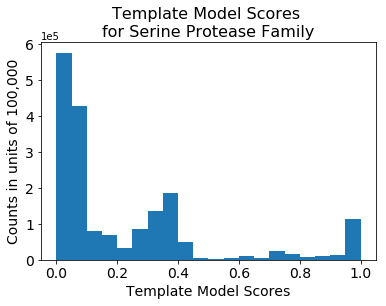

In [87]:
plt.hist(Values, bins=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ticklabel_format(style = 'sci', scilimits = (0,0))
plt.xlabel('Template Model Scores', fontsize = 14)
plt.ylabel('Counts in units of 100,000', fontsize = 14)
plt.title('Template Model Scores \nfor Serine Protease Family', fontsize=16)

Looks like 0.5 is a good Threshhold (see paper and references).  Any protein pair with a similarity above this threshold are assumed to be similar. 

In [77]:
len(Values[ Values > 0.5])

208649

In [73]:
len(Values)

1860322

We now create a network model of the similarities. 

In [102]:
G = nx.Graph()
for col in SP.columns:
    for ind in SP.index:
        if( 0.5 <= SP.loc[ind,col] <= 1):
            G.add_edge(ind,col, weight = SP.loc[ind,col])

In [103]:
G.order()

1898

In [104]:
Gc = [ gc for gc in nx.connected_component_subgraphs(G)]

Result is a graph with a large (giant) component and many much smaller components. 

In [105]:
for gc in Gc:
    print(gc.order())

1408
4
2
34
5
34
26
6
42
2
20
17
50
11
5
5
29
3
2
6
7
3
2
4
2
4
3
11
3
28
10
5
8
2
4
6
4
12
5
4
9
2
2
2
2
2
3
3
2
4
2
4
4
2
5
2
2
2
2
2
2


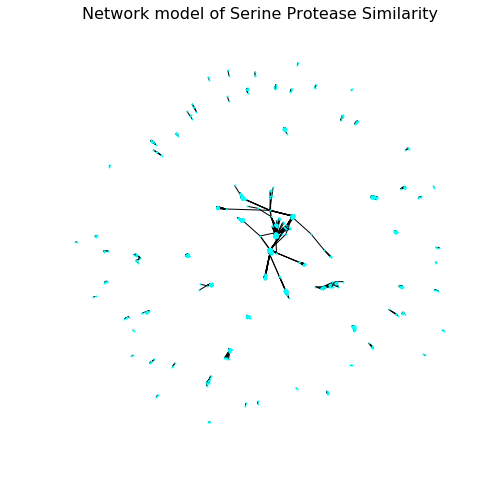

In [110]:
plt.figure(figsize = (8,8))
nx.draw_networkx(G, with_labels = False, node_size = 1, node_color = 'cyan')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.ticklabel_format(style = 'sci', scilimits = (0,0))
#plt.xlabel('Template Model Scores', fontsize = 14)
#plt.ylabel('Counts in units of 100,000', fontsize = 14)
plt.axis('off')
plt.title('Network model of Serine Protease Similarity', fontsize=16)

In [114]:
GC = Gc[0]
GC.order()

1408

In [166]:
Vpos = nx.spring_layout(GC)

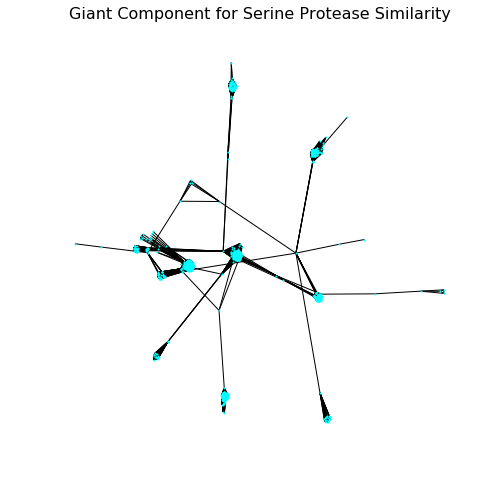

In [167]:
plt.figure(figsize = (8,8))
nx.draw_networkx(GC, pos = Vpos, with_labels = False, node_size = 1, node_color = 'cyan')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.axis('off')
plt.title('Giant Component for Serine Protease Similarity', fontsize=16)

Now we use spectral clustering via the Fiedler vector  to cluster the giant component. 

In [135]:
from networkx.linalg import algebraicconnectivity as ac

In [ ]:
m = ac.fiedler_vector(GC, weight = None)

In [159]:
cp = []
cn = []
verts = GC.nodes()

for i in range(len(m)):
    if( m[i] < 0 ):
        cn.append(verts[i])
    else:
        cp.append(verts[i])

In [160]:
GP = G.subgraph(cp)
GN = G.subgraph(cn)

We use different colors to separate the clusters visually. 

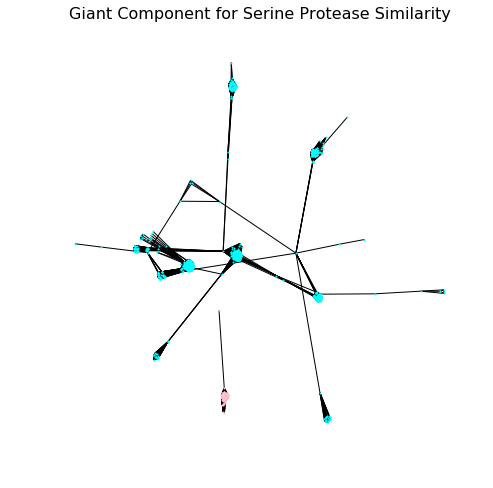

In [169]:
plt.figure(figsize = (8,8))
nx.draw_networkx(GP, pos = Vpos, with_labels = False, node_size = 1, node_color = 'pink')
nx.draw_networkx(GN, pos = Vpos, with_labels = False, node_size = 1, node_color = 'cyan')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.axis('off')
plt.title('Giant Component for Serine Protease Similarity', fontsize=16)

We continue in the same fashion.  

(array([ 410.,    0.,    1.,    4.,    0.,    0.,  215.,    8.,  580.,   77.]),
 array([-0.04019968, -0.03276741, -0.02533513, -0.01790285, -0.01047058,
        -0.0030383 ,  0.00439398,  0.01182626,  0.01925853,  0.02669081,
         0.03412309]),
 <a list of 10 Patch objects>)

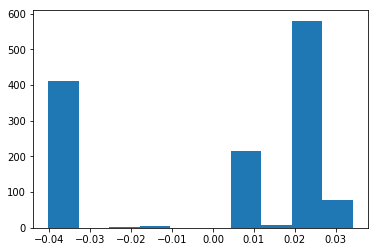

In [174]:
m1 = ac.fiedler_vector(GN, weight = None)
plt.hist(m1)

In [184]:
cp = []
cn = []
verts = GN.nodes()

for i in range(len(m1)):
    if( m1[i] < -0.03 ):
        cn.append(verts[i])
    elif( m1[i] > 0.0 ): 
        cp.append(verts[i])

In [185]:
GNP = G.subgraph(cp)
GNN = G.subgraph(cn)

More clusters, so more colors. 

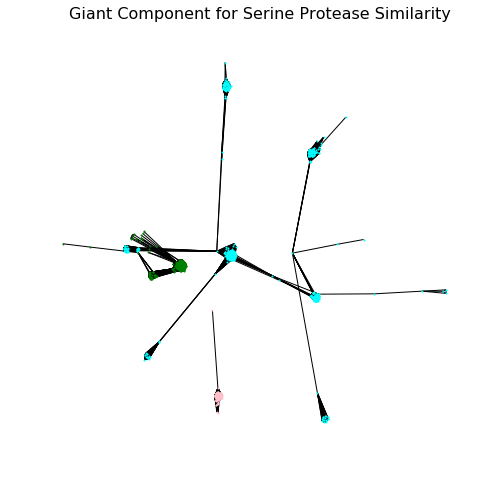

In [186]:
plt.figure(figsize = (8,8))
nx.draw_networkx(GP, pos = Vpos, with_labels = False, node_size = 1, node_color = 'pink')
nx.draw_networkx(GNP, pos = Vpos, with_labels = False, node_size = 1, node_color = 'cyan')
nx.draw_networkx(GNN, pos = Vpos, with_labels = False, node_size = 1, node_color = 'green')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.axis('off')
plt.title('Giant Component for Serine Protease Similarity', fontsize=16)

(array([  75.,    2.,    0.,    0.,    0.,  581.,    2.,  110.,    3.,  107.]),
 array([-0.08830785, -0.07366648, -0.05902511, -0.04438374, -0.02974236,
        -0.01510099, -0.00045962,  0.01418175,  0.02882312,  0.04346449,
         0.05810587]),
 <a list of 10 Patch objects>)

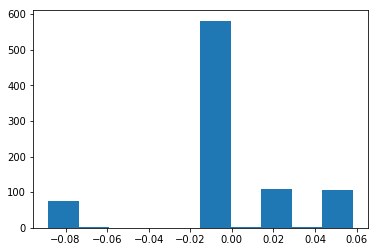

In [187]:
m1 = ac.fiedler_vector(GNP, weight = None)
plt.hist(m1)

In [188]:
cp = []
cn = []
verts = GNP.nodes()

for i in range(len(m1)):
    if( m1[i] < 0 ):
        cn.append(verts[i])
    elif( m1[i] > 0.0 ): 
        cp.append(verts[i])

In [189]:
GNPP = G.subgraph(cp)
GNPN = G.subgraph(cn)

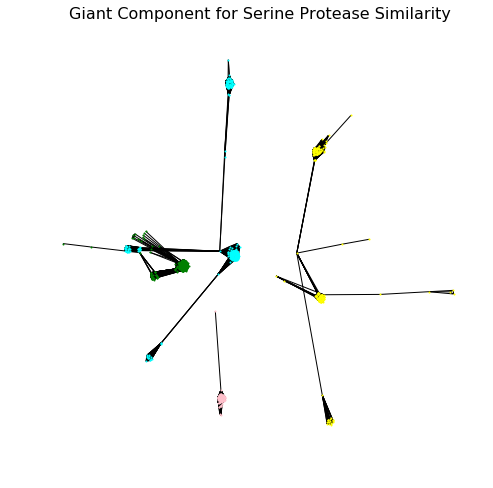

In [190]:
plt.figure(figsize = (8,8))
nx.draw_networkx(GP, pos = Vpos, with_labels = False, node_size = 1, node_color = 'pink')
nx.draw_networkx(GNPP, pos = Vpos, with_labels = False, node_size = 1, node_color = 'yellow')
nx.draw_networkx(GNPN, pos = Vpos, with_labels = False, node_size = 1, node_color = 'cyan')
nx.draw_networkx(GNN, pos = Vpos, with_labels = False, node_size = 1, node_color = 'green')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.axis('off')
plt.title('Giant Component for Serine Protease Similarity', fontsize=16)

Probably should have cycled the colors. 

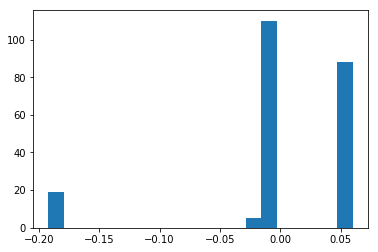

In [196]:
m1 = ac.fiedler_vector(GNPP, weight = None)
plt.hist(m1, bins = 20);

In [197]:
cp = []
cn = []
verts = GNPP.nodes()

for i in range(len(m1)):
    if( m1[i] < 0 ):
        cn.append(verts[i])
    elif( m1[i] > 0.0 ): 
        cp.append(verts[i])

In [198]:
GNPPP = G.subgraph(cp)
GNPPN = G.subgraph(cn)

(array([ 581.,    0.,    0.,    0.,    0.,    0.,    1.,    1.,    0.,   75.]),
 array([-0.01627212, -0.00377631,  0.0087195 ,  0.02121531,  0.03371112,
         0.04620693,  0.05870274,  0.07119855,  0.08369436,  0.09619017,
         0.10868599]),
 <a list of 10 Patch objects>)

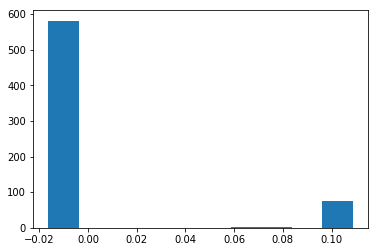

In [199]:
m2 = ac.fiedler_vector(GNPN, weight = None)
plt.hist(m2)

In [201]:
cp = []
cn = []
verts = GNPN.nodes()

for i in range(len(m2)):
    if( m2[i] < 0 ):
        cn.append(verts[i])
    elif( m2[i] > 0.09 ): 
        cp.append(verts[i])

In [202]:
GNPNP = G.subgraph(cp)
GNPNN = G.subgraph(cn)

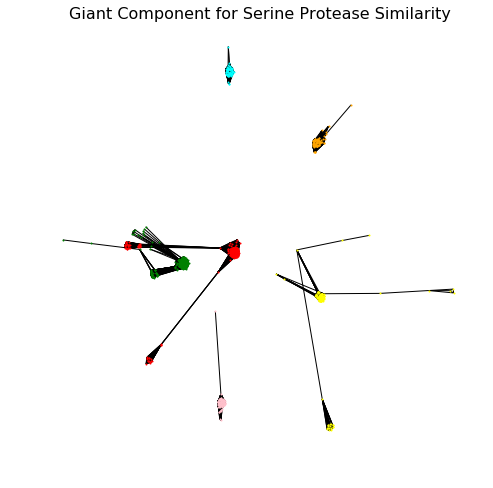

In [203]:
plt.figure(figsize = (8,8))
nx.draw_networkx(GP, pos = Vpos, with_labels = False, node_size = 1, node_color = 'pink')
nx.draw_networkx(GNPPN, pos = Vpos, with_labels = False, node_size = 1, node_color = 'yellow')
nx.draw_networkx(GNPPP, pos = Vpos, with_labels = False, node_size = 1, node_color = 'orange')
nx.draw_networkx(GNPNP, pos = Vpos, with_labels = False, node_size = 1, node_color = 'cyan')
nx.draw_networkx(GNPNN, pos = Vpos, with_labels = False, node_size = 1, node_color = 'red')
nx.draw_networkx(GNN, pos = Vpos, with_labels = False, node_size = 1, node_color = 'green')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.axis('off')
plt.title('Giant Component for Serine Protease Similarity', fontsize=16)

(array([   5.,  109.,    1.,    0.,    0.,    0.,    0.,    0.,    0.,   19.]),
 array([-0.0702849 , -0.04201353, -0.01374217,  0.01452919,  0.04280056,
         0.07107192,  0.09934329,  0.12761465,  0.15588602,  0.18415738,
         0.21242875]),
 <a list of 10 Patch objects>)

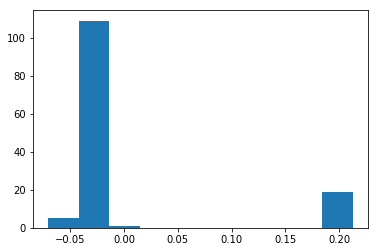

In [204]:
m2 = ac.fiedler_vector(GNPPN, weight = None)
plt.hist(m2)

In [205]:
cp = []
cn = []
verts = GNPPN.nodes()

for i in range(len(m2)):
    if( m2[i] < -0.015 ):
        cn.append(verts[i])
    elif( m2[i] > 0 ): 
        cp.append(verts[i])

In [206]:
GNPPNP = G.subgraph(cp)
GNPPNN = G.subgraph(cn)

(array([ 564.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,   17.]),
 array([-0.01552497,  0.01022427,  0.03597351,  0.06172275,  0.08747199,
         0.11322123,  0.13897048,  0.16471972,  0.19046896,  0.2162182 ,
         0.24196744]),
 <a list of 10 Patch objects>)

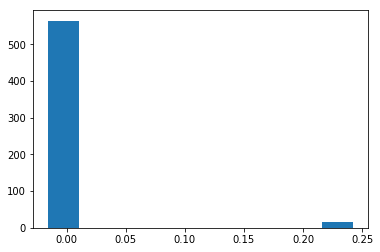

In [208]:
m2 = ac.fiedler_vector(GNPNN, weight = None)
plt.hist(m2)

In [209]:
cp = []
cn = []
verts = GNPNN.nodes()

for i in range(len(m2)):
    if( m2[i] < 0 ):
        cn.append(verts[i])
    elif( m2[i] > 0 ): 
        cp.append(verts[i])

In [210]:
GNPNNP = G.subgraph(cp)
GNPNNN = G.subgraph(cn)

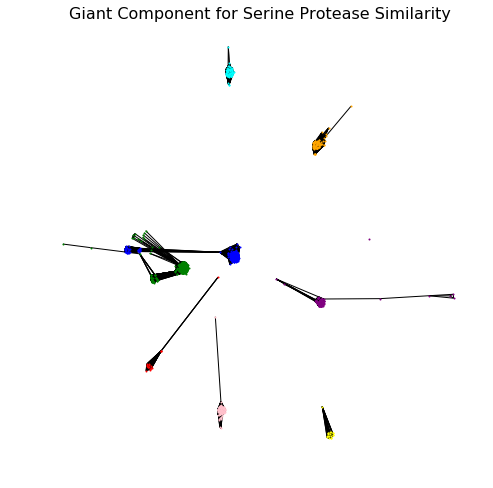

In [211]:
plt.figure(figsize = (8,8))
nx.draw_networkx(GP, pos = Vpos, with_labels = False, node_size = 1, node_color = 'pink')
nx.draw_networkx(GNPPNP, pos = Vpos, with_labels = False, node_size = 1, node_color = 'yellow')
nx.draw_networkx(GNPPNN, pos = Vpos, with_labels = False, node_size = 1, node_color = 'purple')
nx.draw_networkx(GNPPP, pos = Vpos, with_labels = False, node_size = 1, node_color = 'orange')
nx.draw_networkx(GNPNP, pos = Vpos, with_labels = False, node_size = 1, node_color = 'cyan')
nx.draw_networkx(GNPNNP, pos = Vpos, with_labels = False, node_size = 1, node_color = 'red')
nx.draw_networkx(GNPNNN, pos = Vpos, with_labels = False, node_size = 1, node_color = 'blue')
nx.draw_networkx(GNN, pos = Vpos, with_labels = False, node_size = 1, node_color = 'green')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.axis('off')
plt.title('Giant Component for Serine Protease Similarity', fontsize=16)

(array([ 527.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,   36.]),
 array([-0.01105313,  0.00632685,  0.02370683,  0.04108681,  0.0584668 ,
         0.07584678,  0.09322676,  0.11060675,  0.12798673,  0.14536671,
         0.16274669]),
 <a list of 10 Patch objects>)

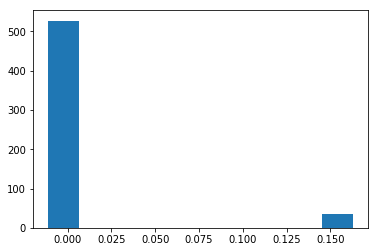

In [212]:
m2 = ac.fiedler_vector(GNPNNN, weight = None)
plt.hist(m2)

In [219]:
cp = []
cn = []
verts = GNPNNN.nodes()

for i in range(len(m2)):
    if( m2[i] < 0 ):
        cn.append(verts[i])
    elif( m2[i] > 0 ): 
        cp.append(verts[i])

In [220]:
GNPNNNP = G.subgraph(cp)
GNPNNNN = G.subgraph(cn)

(array([ 408.,    0.,    0.,    0.,    0.,    0.,    1.,    0.,    0.,    1.]),
 array([-0.00603643,  0.0776618 ,  0.16136003,  0.24505826,  0.32875649,
         0.41245472,  0.49615295,  0.57985118,  0.66354941,  0.74724764,
         0.83094587]),
 <a list of 10 Patch objects>)

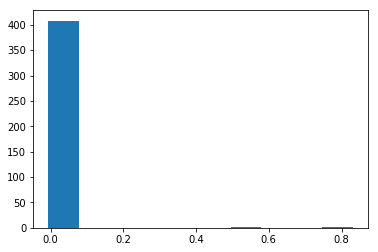

In [222]:
m2 = ac.fiedler_vector(GNN, weight = None)
plt.hist(m2)

In [223]:
cp = []
cn = []
verts = GNN.nodes()

for i in range(len(m2)):
    if( m2[i] < 0 ):
        cn.append(verts[i])
    elif( m2[i] > 0 ): 
        cp.append(verts[i])

In [224]:
GNNP = G.subgraph(cp)
GNNN = G.subgraph(cn)

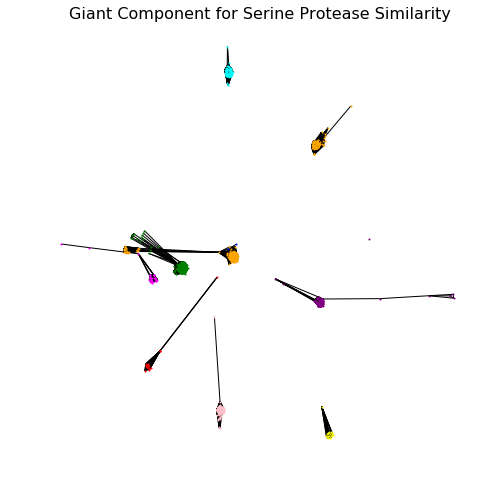

In [225]:
plt.figure(figsize = (8,8))
nx.draw_networkx(GP, pos = Vpos, with_labels = False, node_size = 1, node_color = 'pink')
nx.draw_networkx(GNPPNP, pos = Vpos, with_labels = False, node_size = 1, node_color = 'yellow')
nx.draw_networkx(GNPPNN, pos = Vpos, with_labels = False, node_size = 1, node_color = 'purple')
nx.draw_networkx(GNPPP, pos = Vpos, with_labels = False, node_size = 1, node_color = 'orange')
nx.draw_networkx(GNPNP, pos = Vpos, with_labels = False, node_size = 1, node_color = 'cyan')
nx.draw_networkx(GNPNNP, pos = Vpos, with_labels = False, node_size = 1, node_color = 'red')
nx.draw_networkx(GNPNNNP, pos = Vpos, with_labels = False, node_size = 1, node_color = 'blue')
nx.draw_networkx(GNPNNNN, pos = Vpos, with_labels = False, node_size = 1, node_color = 'orange')
nx.draw_networkx(GNNN, pos = Vpos, with_labels = False, node_size = 1, node_color = 'green')
nx.draw_networkx(GNNP, pos = Vpos, with_labels = False, node_size = 1, node_color = 'magenta')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.axis('off')
plt.title('Giant Component for Serine Protease Similarity', fontsize=16)

(array([ 351.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,   23.]),
 array([-0.01329918,  0.00850097,  0.03030111,  0.05210125,  0.07390139,
         0.09570153,  0.11750167,  0.13930182,  0.16110196,  0.1829021 ,
         0.20470224]),
 <a list of 10 Patch objects>)

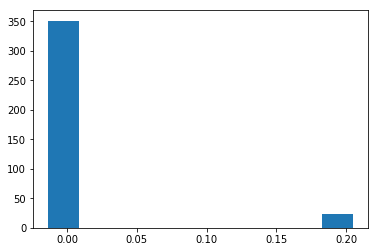

In [226]:
m2 = ac.fiedler_vector(GNPNNNN, weight = None)
plt.hist(m2)

In [227]:
cp = []
cn = []
verts = GNPNNNN.nodes()

for i in range(len(m2)):
    if( m2[i] < 0 ):
        cn.append(verts[i])
    elif( m2[i] > 0 ): 
        cp.append(verts[i])

In [228]:
GNPNNNNP = G.subgraph(cp)
GNPNNNNN = G.subgraph(cn)

In [229]:
m2 = ac.fiedler_vector(GNPPNN, weight = None)
plt.hist(m2)

NetworkXError: graph is not connected.

In [223]:
cp = []
cn = []
verts = GNPPNN.nodes()

for i in range(len(m2)):
    if( m2[i] < 0 ):
        cn.append(verts[i])
    elif( m2[i] > 0 ): 
        cp.append(verts[i])

In [224]:
GNPPNNP = G.subgraph(cp)
GNPPNNN = G.subgraph(cn)

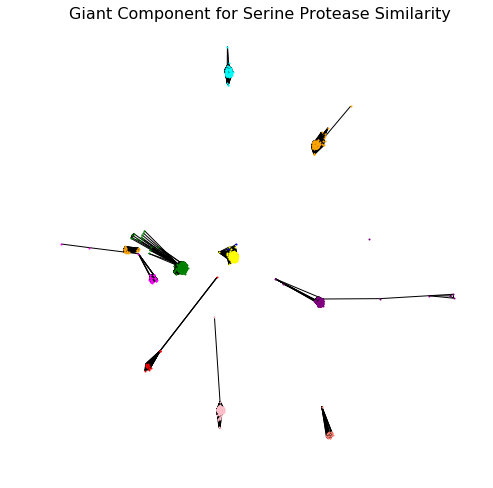

In [317]:
plt.figure(figsize = (8,8))
nx.draw_networkx(GP, pos = Vpos, with_labels = False, node_size = 1, node_color = 'pink')
nx.draw_networkx(GNPPNP, pos = Vpos, with_labels = False, node_size = 1, node_color = 'yellow')
nx.draw_networkx(GNPPNN, pos = Vpos, with_labels = False, node_size = 1, node_color = 'purple')
nx.draw_networkx(GNPPP, pos = Vpos, with_labels = False, node_size = 1, node_color = 'orange')
nx.draw_networkx(GNPNP, pos = Vpos, with_labels = False, node_size = 1, node_color = 'cyan')
nx.draw_networkx(GNPNNP, pos = Vpos, with_labels = False, node_size = 1, node_color = 'red')
nx.draw_networkx(GNPNNNP, pos = Vpos, with_labels = False, node_size = 1, node_color = 'blue')
nx.draw_networkx(GNPNNNNP, pos = Vpos, with_labels = False, node_size = 1, node_color = 'orange')
nx.draw_networkx(GNPNNNNN, pos = Vpos, with_labels = False, node_size = 1, node_color = 'yellow')
nx.draw_networkx(GNNN, pos = Vpos, with_labels = False, node_size = 1, node_color = 'green')
nx.draw_networkx(GNNP, pos = Vpos, with_labels = False, node_size = 1, node_color = 'magenta')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.axis('off')
plt.title('Giant Component for Serine Protease Similarity', fontsize=16)

In [231]:
IsoG = [ GP, GNPPNP, GNPPNN, GNPPP, GNPNP, GNPNNP, GNPNNNP, GNPNNNNP, GNPNNNNN, GNNN, GNNP]

In [233]:
[g.order() for g in IsoG]

[113, 19, 113, 88, 75, 18, 36, 23, 351, 374, 36]

In [241]:
SPc = pd.read_csv('pbd_chain_uniprotPF00089.csv')
SPc.head()

PDB CHAIN SP_PRIMARY  PFAM_ID
0  1a0h     B     P00735  PF00089
1  1a0j     A     P35033  PF00089
2  1a0l     A     P20231  PF00089
3  1a2c     H     P00734  PF00089
4  1a3b     H     P00734  PF00089

In [245]:
ChainDict = dict()
for i in range(len(SPc)):
    ChainDict[ SPc.loc[i,'PDB'] ] = SPc.loc[i,'CHAIN']

In [246]:
ChainDict['1a0h'], ChainDict['1a3b']

('B', 'H')

In [248]:
from Bio import Seq, motifs, PDB
from Bio.Align import MultipleSeqAlignment
from Bio.SeqRecord import SeqRecord

parser = PDB.PDBParser(QUIET=True)
ppb = PDB.PPBuilder()

In [324]:
g = IsoG[9]

Sequences = []
PDBs = []

for pdb_i in g:
    chain_i = ChainDict[pdb_i]
    FNi = r'C:\Uniprot\SP\pdb%s.ent' % pdb_i
    
#    try:
    structure = parser.get_structure(chain_i, FNi)
    structure = ppb.build_peptides(structure)[0]
#    except:
#        structure = []
 
    Sequences.append(structure.get_sequence())
    PDBs.append(pdb_i)

In [325]:
Sequences[:10]

[Seq('GEADCGLRPLFEKKSLEDKTERELLESYID', ProteinAlphabet()),
 Seq('ADCGLRPLFEKKSLEDKTERELLESYI', ProteinAlphabet()),
 Seq('EADCGLRPLFEKKSLEDKTERELLESYID', ProteinAlphabet()),
 Seq('ADCGLRPLFEKKSLEDKTERELLESY', ProteinAlphabet()),
 Seq('ADCGLRPLFEKKSLEDKTERELLESY', ProteinAlphabet()),
 Seq('ANAFL', ProteinAlphabet()),
 Seq('ADCGLRPLFEKKSLEDKTERELLESYI', ProteinAlphabet()),
 Seq('EADCGLRPLFEKKSLEDKTERELLESYID', ProteinAlphabet()),
 Seq('ADCGLRPLFEKKSLEDKTERELLESYI', ProteinAlphabet()),
 Seq('ADCGLRPLFEKKSLEDKTERELLESYIDG', ProteinAlphabet())]

(array([ 285.,   77.,    3.,    0.,    0.,    2.,    4.,    0.,    0.,    3.]),
 array([   5.,   34.,   63.,   92.,  121.,  150.,  179.,  208.,  237.,
         266.,  295.]),
 <a list of 10 Patch objects>)

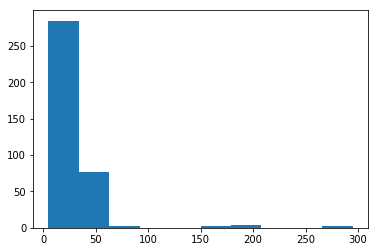

In [326]:
plt.hist([ len(seq) for seq in Sequences])

In [327]:
MSeq = [ str(seq[:30]) for seq in Sequences if len(seq) >= 30 ]

In [328]:
#M = motifs.create(MSeq)#, alphabet = Alphabet.IUPAC.protein )

In [329]:
for seq in MSeq:
    print(seq)

GEADCGLRPLFEKKSLEDKTERELLESYID
TFGSGEADCGLRPLFEKKSLEDKTERELLE
GEADCGLRPLFEKKSLEDKTERELLESYID
GEADCGLRPLFEKKSLEDKTERELLESYID
ADCGLRPLFEKKSLEDKTERELLESYIDGR
STATDVFWAKYTACETARTPRDKLAACLEG
TSEDHFQPFFNEKTFGAGEADCGLRPLFEK
GEADCGLRPLFEKKSLEDKTERELLESYID
GEADCGLRPLFEKKQVQDQTEKELFESYIE
TFGSGEADCGLRPLFEKKSLEDKTERELLE
TFGAGEADCGLRPLFEKKQVQDQTEKELFE
ADCGLRPLFEKKSLEDKTERELLESYIDGR
SGEADCGLRPLFEKKSLEDKTERELLESYI
TSEDHFQPFFNEKTFGAGEADCGLRPLFEK
EYQTFFNPRTFGSGEADCGLRPLFEKKSLE
SEYQTFFNPRTFGSGEADCGLRPLFEKKSL
SGEADCGLRPLFEKKSLEDKTERELLESYI
FGSGEADCGLRPLFEKKSLEDKTERELLES
TFGAGEADCGLRPLFEKKQVQDQTEKELFE
TFGSGEADCGLRPLFEKKSLEDKTERELLE
TFGSGEADCGLRPLFEKKSLEDKTERELLE
GEADCGLRPLFEKKSLEDKTERELLESYID
GSGEADCGLRPLFEKKSLEDKTERELLESY
TFFNPRTFGSGEADCGLRPLFEKKSLEDKT
GEADCGLRPLFEKKSLEDKTERELLESYID
TFGSGEADCGLRPLFEKKSLEDKTERELLE
TFGSGEADCGLRPLFEKKSLEDKTERELLE
SEYQTFFNPRTFGSGEADCGLRPLFEKKSL
TFGSGEADCGLRPLFEKKSLEDKTERELLE
EADCGLRPLFEKKSLEDKTERELLESYIDG
EADCGLRPLFEKKSLKDTTEKELLDSYIDG
SEYQTFFNPRTFGSGEADCGLRPLFEKKSL
FHTFFNEK

In [280]:
RR.alphabet

ProteinAlphabet()

In [269]:
len(RR)

234

In [270]:
MSeq

[]

In [281]:
from Bio import Alphabet

In [282]:
Alphabet.ProteinAlphabet()

ProteinAlphabet()

In [236]:
g = IsoG[0]

In [237]:
g.nodes()[0]

'2y5h'

In [242]:
SPc.loc[SP.PDB == '2y5h', 'Chain']

AttributeError: 'DataFrame' object has no attribute 'PDB'

In [240]:
SP

PDB   1a0h    1a0j    1a0l    1a2c    1a3b    1a3e    1a46    1a4w    1a5g  \
PDB                                                                          
1a0h   0.0  0.0484  0.0428  0.1400  0.1310  0.1300  0.1240  0.1240  0.1300   
1a0j   0.0  0.0000  0.3860  0.0328  0.0208  0.0251  0.0276  0.0248  0.0279   
1a0l   0.0  0.0000  0.0000  0.0364  0.0256  0.0255  0.0254  0.0253  0.0255   
1a2c   0.0  0.0000  0.0000  0.0000  0.0784  0.7160  0.7030  0.6970  0.7380   
1a3b   0.0  0.0000  0.0000  0.0000  0.0000  0.9780  0.9030  0.9320  0.9270   
1a3e   0.0  0.0000  0.0000  0.0000  0.0000  0.0000  0.9210  0.9480  0.9460   
1a46   0.0  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.9460  0.9520   
1a4w   0.0  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.9490   
1a5g   0.0  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000   
1a5h   0.0  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000   
1a5i   0.0  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000   
1a61   0.0  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000   
1a7s   0.0  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000   
1abi   0.0  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000   
1abj   0.0  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000   
1acb   0.0  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000   
1ad8   0.0  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000   
1ae5   0.0  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000   
1ae8   0.0  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000   
1afe   0.0  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000   
1aht   0.0  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000   
1ai8   0.0  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000   
1aix   0.0  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000   
1amh   0.0  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000   
1an1   0.0  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000   
1anb   0.0  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000   
1anc   0.0  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000   
1and   0.0  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000   
1ane   0.0  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000   
1ao5   0.0  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000   
...    ...     ...     ...     ...     ...     ...     ...     ...     ...   
5tnt   0.0  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000   
5to3   0.0  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000   
5tp0   0.0  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000   
5tqe   0.0  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000   
5tqf   0.0  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000   
5tqg   0.0  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000   
5tz9   0.0  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000   
5u6j   0.0  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000   
5ugd   0.0  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000   
5ugg   0.0  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000   
5wb6   0.0  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000   
5xg4   0.0  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000   
6avl   0.0  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000   
6b6n   0.0  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000   
6b6p   0.0  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000   
6b6q   0.0  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000   
6b6r   0.0  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000   
6b6s   0.0  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000   
6eo6   0.0  0.0000  0.

In [129]:
L = -nx.to_pandas_dataframe(GC)
L.head()

2hpq  1ane  2r0k  1mmj   3da9  3qgn  2y5h  4ogy   5f6m   1o2x  ...   \
2hpq -0.000  -0.0  -0.0  -0.0 -0.778 -0.85  -0.0  -0.0 -0.000 -0.000  ...    
1ane -0.000  -0.0  -0.0  -0.0 -0.000 -0.00  -0.0  -0.0 -0.735 -0.735  ...    
2r0k -0.000  -0.0  -0.0  -0.0 -0.000 -0.00  -0.0  -0.0 -0.000 -0.000  ...    
1mmj -0.000  -0.0  -0.0  -0.0 -0.000 -0.00  -0.0  -0.0 -0.000 -0.000  ...    
3da9 -0.778  -0.0  -0.0  -0.0 -0.000 -0.00  -0.0  -0.0 -0.000 -0.000  ...    

       1b7x   1zzz   2zf0   1a0j  1lhd  3btg   3a7x   2c8z   1aix  3cen  
2hpq -0.850 -0.000 -0.791 -0.000 -0.00  -0.0 -0.000 -0.000 -0.836  -0.0  
1ane -0.000 -0.734 -0.000 -0.658 -0.00  -0.0 -0.735 -0.000 -0.000  -0.0  
2r0k -0.000 -0.000 -0.000 -0.000 -0.00  -0.0 -0.000 -0.000 -0.000  -0.0  
1mmj -0.000 -0.000 -0.000 -0.000 -0.00  -0.0 -0.000 -0.000 -0.000  -0.0  
3da9 -0.879 -0.000 -0.940 -0.000 -0.94  -0.0 -0.000 -0.912 -0.963  -0.0  

[5 rows x 1408 columns]

In [130]:
for i in range(len(L)):
    L.iloc[i,i] = -np.sum(L.iloc[i])
L.head()

2hpq     1ane   2r0k     1mmj     3da9  3qgn  2y5h  4ogy   5f6m  \
2hpq  195.775   -0.000 -0.000   -0.000   -0.778 -0.85  -0.0  -0.0 -0.000   
1ane   -0.000  373.203 -0.000   -0.000   -0.000 -0.00  -0.0  -0.0 -0.735   
2r0k   -0.000   -0.000  2.315   -0.000   -0.000 -0.00  -0.0  -0.0 -0.000   
1mmj   -0.000   -0.000 -0.000  101.062   -0.000 -0.00  -0.0  -0.0 -0.000   
3da9   -0.778   -0.000 -0.000   -0.000  281.979 -0.00  -0.0  -0.0 -0.000   

       1o2x  ...    1b7x   1zzz   2zf0   1a0j  1lhd  3btg   3a7x   2c8z  \
2hpq -0.000  ...  -0.850 -0.000 -0.791 -0.000 -0.00  -0.0 -0.000 -0.000   
1ane -0.735  ...  -0.000 -0.734 -0.000 -0.658 -0.00  -0.0 -0.735 -0.000   
2r0k -0.000  ...  -0.000 -0.000 -0.000 -0.000 -0.00  -0.0 -0.000 -0.000   
1mmj -0.000  ...  -0.000 -0.000 -0.000 -0.000 -0.00  -0.0 -0.000 -0.000   
3da9 -0.000  ...  -0.879 -0.000 -0.940 -0.000 -0.94  -0.0 -0.000 -0.912   

       1aix  3cen  
2hpq -0.836  -0.0  
1ane -0.000  -0.0  
2r0k -0.000  -0.0  
1mmj -0.000  -0.0  
3da9 -0.963  -0.0  

[5 rows x 1408 columns]

In [131]:
L.dot(np.ones(len(L)))

2hpq    4.263256e-14
1ane    1.108447e-12
2r0k    0.000000e+00
1mmj   -2.842171e-14
3da9    1.421085e-13
3qgn   -1.421085e-13
2y5h   -7.105427e-15
4ogy    1.065814e-14
5f6m   -1.989520e-13
1o2x    9.947598e-13
2r2m   -1.136868e-13
3gy5    7.958079e-13
4btu    0.000000e+00
3ldx    8.526513e-14
1dpo   -5.684342e-14
2zzu    0.000000e+00
3rxf    5.684342e-13
1mh0   -1.705303e-13
1shh    5.684342e-14
1thr    1.136868e-13
3t29   -7.673862e-13
1ql9    1.705303e-13
5l6n    1.278977e-13
5mnb    4.831691e-13
3btt    5.115908e-13
1w14   -5.329071e-14
2d1j   -7.105427e-14
2jh6   -1.421085e-13
1ae8   -4.263256e-14
7kme    1.136868e-13
            ...     
1s0q    1.023182e-12
1wtg    0.000000e+00
3i29    9.663381e-13
1gj5    1.989520e-13
3lu9    1.421085e-14
1k1m    1.961098e-12
1a2c    5.684342e-14
5lhp    7.105427e-15
2boh    1.776357e-15
2viv    0.000000e+00
2gde   -5.684342e-14
4abd    1.506351e-12
2zps   -8.526513e-14
3t25    9.663381e-13
1d6r   -4.547474e-13
3rxk    1.165290e-12
1lhe    1.136

In [144]:
cp = []
cn = []
verts = G.nodes()

for i in range(len(m)):
    if( m[i] < 0 ):
        cn.append(verts[i])
    else:
        cp.append(verts[i])

In [142]:
m[:10]

array([-0.00724844, -0.0068415 , -0.00981561, -0.00912475, -0.00724846,
       -0.00724845,  0.09048522, -0.0112355 , -0.00684159, -0.0068415 ])

(array([  1.29500000e+03,   0.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.12000000e+02]),
 array([-0.0116358 , -0.00141841,  0.00879898,  0.01901636,  0.02923375,
         0.03945114,  0.04966852,  0.05988591,  0.07010329,  0.08032068,
         0.09053807]),
 <a list of 10 Patch objects>)

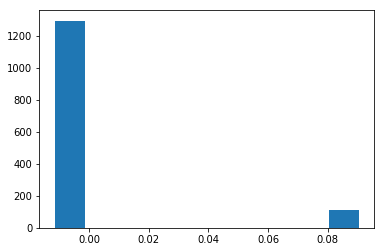

In [143]:
plt.hist(m)